# Project Linear Regression: Boston House Price Prediction<br>
By Adam M. Lang




---
### Problem Statement
---------------------------
The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

----------------------------
### Data Information
---------------------------
Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM:     per capita crime rate by town
- ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS:    proportion of non-retail business acres per town
- CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX:      nitric oxides concentration (parts per 10 million)
- RM:       average number of rooms per dwelling
- AGE:      proportion of owner-occupied units built prior to 1940
- DIS:      weighted distances to five Boston employment centres
- RAD:      index of accessibility to radial highways
- TAX:      full-value property-tax rate per 10,000 dollars
- PTRATIO:  pupil-teacher ratio by town
- LSTAT:    %lower status of the population
- MEDV:     Median value of owner-occupied homes in 1000 dollars.

-------
### Tools
-----------
- We will use sklearn and statsmodel for this exercise


---------------------------

**Importing Libraries**

In [263]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


###Load the dataset

In [264]:
df = pd.read_csv("Boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Check the shape of the dataset**

In [265]:
df.shape

(506, 13)

**Get the info data types column wise**

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


### 1. Check missing values

In [267]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

It appears there are no missing values in the dataset. 

### 2. Figure out the statistical Summary of all the numerical columns. Mention all the columns that present a significant skew by looking at the summary.

In [245]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


**Insights:**
* The CRIM variable (per capita crime rate by town) has a mean of 3.61 and median of 0.2565. This hints at a right skewed distribution. We can see most of the data in the 1st and 3rd quartiles is closer to the mean and median and there is a large maximum of 88.9 which could be an outlier and also part of the right skew. 
* ZN variable also has a right skew with the mean at 11.36 and the median at 0.00. Part of the right skew tail is a maximum outlier of 100. 
* Age appears to have a larger left skew with the mean of 68.57 and a larger median of 77.50. The standard deviation is also quite large at 28.14. 
* RAD appears to have a right skew with a mean of 9.54 being larger than the median of 5.00. The maximum of 24 is quite large and would sit in the tail of the skew as compared to where most of the data sits closer to the median, min and first quartile. 
* TAX also appears to have a right skew with a mean of 408.23 and median of 330. The maximum of 711 sits in the right skewed tail. The standard deviation is quite large at 168.5 and there is a significant difference between the 3rd quartile of 666 and the 1st quartile of 279. 
* The following variables appear not to have no skew at all: INDUS, CHAS, NOX, RM, DIS, PTRATIO, LSTAT, and MEDV. 

###### 3. Visualising the features at hand

- Construct a pairplot for all the features using 'kde' type for the diagonal.
- Provide insights from the plots

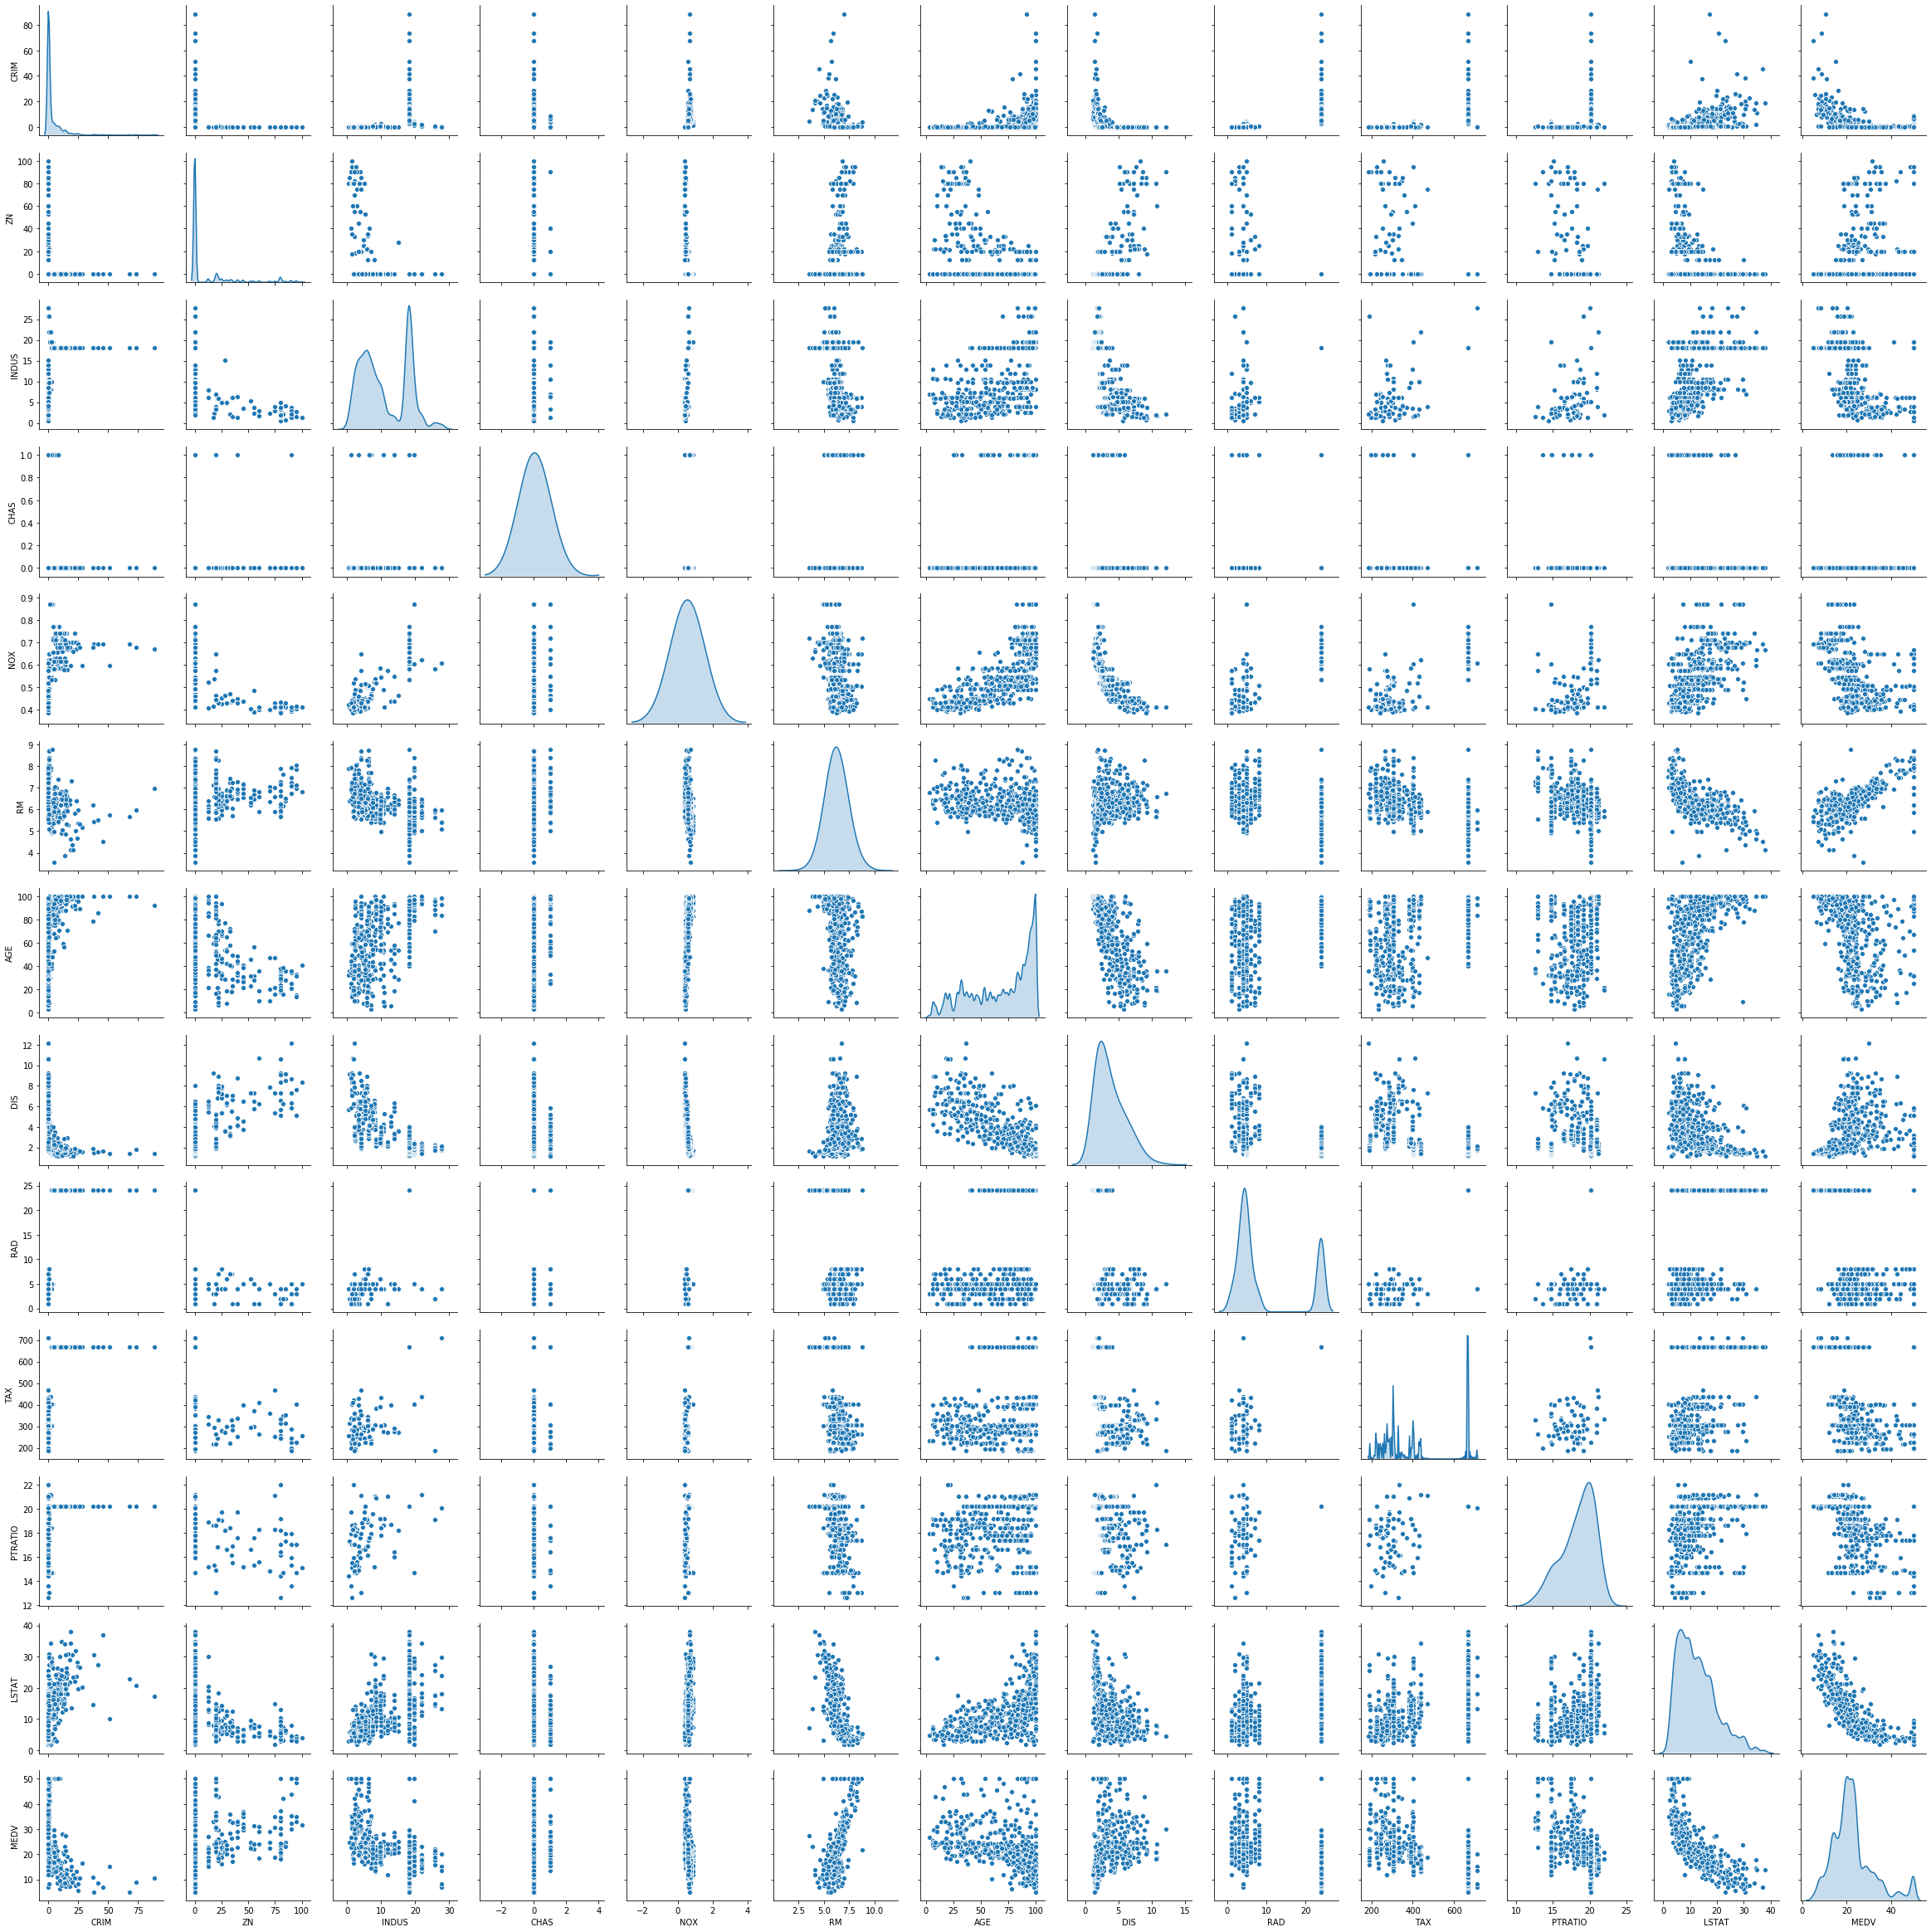

<Figure size 864x576 with 0 Axes>

In [268]:
#pairplot
sns.pairplot(df, diag_kind='kde',diag_kws={'bw': 1.0});

plt.figure(figsize=(12,8))
plt.show()

**Insights -**
* Most of the scatterplots above show either no correlation or mostly negative correlations between variables. 
* **There is a positive correlation seen between variables RAD and TAX that could be troublesome if it has a high correlation coefficient and this could lead to multicollinearity and we may need to consider dropping 1 or both of these variables to improve our regression modeling.** 
* The KDE plots on the diagonal show a mostly normal distribution for variables correlated with themselves as the diagonal should. This applies to: CHAS, NOX, and RM. 
* The KDE plots show a multimodal distribution for: INDUS, RAD, and MEDV and TAX.  
* The KDE plot shows a left skewed distribution for Age with its peak at the higher end of the spectrum or older ages. 
* The KDE plot shows right skewed distributions for: CRIM and ZN. 

### 4. Get the Correlation Heatmap and highlight correlation values as asked below.
- Draw the correlation plot with cmap = 'Oranges' 
- Highlight all the correlations above 0.7 
- Observe the correlation value between DIS and NOX and comment on the same.



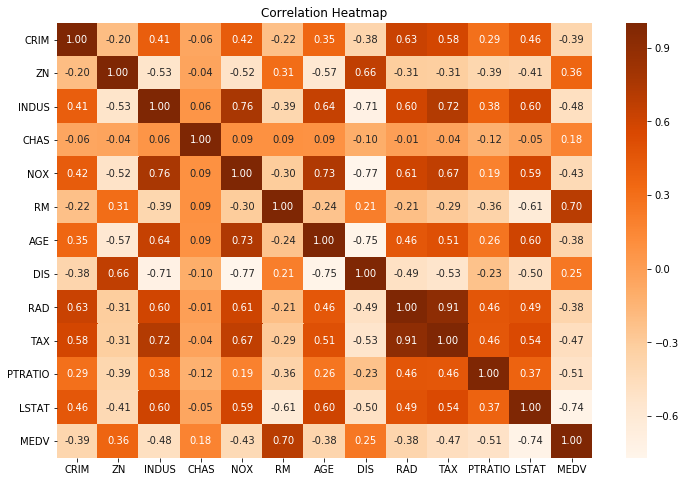

In [269]:
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Oranges' )

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

#plt title and show
plt.title('Correlation Heatmap')
plt.show()

**Comments**
* **The strongest correlation seen appears to be 0.91 between RAD (index of accessibility to radial highways) and TAX (full-value property-tax rate per 10,000 dollars). So for every 0.91 increase in index of accessibility of radial highways there is a 0.91 increase in the full value property tax rate per 10,000 dollars which makes sense - higher taxes for better highway accessibility.**
* **The strong correlation between RAD and TAX also could cause a major issue with multi-collinearity and we may want to drop one or both of these variables.** 
* TAX and INDUS have a moderate correlation of 0.72 as does NOX and INDUS of 0.76. INDUS is the proportion of non-retail business acres per town which means this is more strongly correlated with property tax rate and nitric oxide levels. 
* ZN (proportion of residential land zoned for lots over 25,000 sq.ft.) is negatively correlated with every variable except for MEDV (0.36), DIS (0.66) and RM (0.31). DIS weighted distances to five Boston employment centres appears to have the strongest correlation with this variable. 
* CHAS (Charles River Dummy Variable) appears to have no correlation with AGE (0.09), RM (0.09), NOX (0.09), and INDUS (0.06).
* NOX has a moderately strong correlation with AGE (0.73) and INDUS (0.76). 
* RM (average number of rooms per dwelling) has a moderate correlation with MEDV (0.70) which is the median value of owner-occupied homes in 1000 dollars. This makes sense as the more rooms per dwelling would correlate with a higher home price. All other variables appear to have negative correlations with RM with LSTAT (%lower status of the population) having the strongest negative correlation at -0.61. So we can saw as the %lower status of the population goes down the number of rooms goes up and vice versa.
* AGE (proportion of owner-occupied units built prior to 1940) has a moderate correlation with NOX (0.73), INDUS (0.64) and LSTAT (0.60). It would make sense that older homes have more nitrous oxide concentration. AGE has a stronger negative correlation with DIS (-0.75) and ZN (-0.57). DIS is the weighted distances to five Boston employment centres and this makes sense the older homes may be closer to the 5 employment centers with newer homes built farther away. 
* PTRATIO (pupil-teacher ratio by town) appears to have a moderate negative correlation (-0.51) to MEDV (median value of owner-occupied homes in 1000 dollars). So as the MEDV goes up the PTRATIO goes down and vice versa. PTRATIO otherwise has weakly positive correlations with every other variable. 
* LSTAT has a strong negative correlation (-0.74) with MEDV. As the %lower status of population goes up, the median value of owner-occupied homes goes down. This corresponds to the same finding with the number of rooms. Less rooms and lower home cost where the #lower status of the population tends to live. 
* MEDV we already have seen is negatively correlated with LSTAT and positively correlated with RM. A last interesting finding of MEDV is that it is virtually not correlated at all (0.25) with DIS, showing that distance to employment centers has virtually no influence on median home value. 
* Observing the correlation value between DIS and NOX we can see that it is -0.77 which is a negative correlation. This means that DIS (Weighted distances from the 5 Boston employment centres) is inversely correlated to NOX (Nitric Oxide concentration in parts per million). So for every increase in a weighted distance to an employment center, the Nitric Oxide concentration decreases and vice versa. 

### 5.  Split the dataset
Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [270]:
Y = df['MEDV']
X = df.drop(columns = {'MEDV'})

In [271]:
#splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 , random_state=1)

### 6. Scale the features
- Train the scaler on the train data and use it to transfrom the train and the test data.




In [272]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)

X_train = pd.DataFrame(X_train)
X_train.columns = X.columns

X_test = ss.transform(X_test)

X_test = pd.DataFrame(X_test)
X_test.columns = X.columns

### 7. Modeling

#### 7.1 With all the features

- Use all the features and report the mean of mean_squared_error for the 5 fold validation set.




In [273]:
# Intialise the model and fit the model on the train data
# Let us use the Kfold cross validation with k = 5

from sklearn.model_selection import cross_val_score

lr = LinearRegression()

lr_cv_scores_mse = cross_val_score(lr, X_train, y_train, cv = 5, scoring='neg_mean_squared_error')
lr_cv_scores_mse.mean()

print(lr_cv_scores_mse)
print()
print(" Average MeanSquared Error: %0.3f (+/- %0.3f)" % (lr_cv_scores_mse.mean()*-1, lr_cv_scores_mse.std() * 2))

[-32.62206545 -18.74589693 -27.88080966 -29.08994197 -22.17862333]

 Average MeanSquared Error: 26.103 (+/- 9.964)


**insight**
* As we can see above, the Average MeanSquared Error is 26.103 +/- 9.964.

#### 7.2 Use vif scores to iteratively remove the features with vif values > 5 and report the cross validation Average Mean_Squared_Error at each iteration. 

- Drop the features in an iterative fashion for features With  VIF scores > 5
- Run cross validation with 5 fold to report the average mean_squared_error 

In [274]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series([variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],index=X_train.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series))

Series before feature selection: 

CRIM        1.924114
ZN          2.743574
INDUS       3.999538
CHAS        1.076564
NOX         4.396157
RM          1.860950
AGE         3.150170
DIS         4.355469
RAD         8.345247
TAX        10.191941
PTRATIO     1.943409
LSTAT       2.861881
dtype: float64



**Lets drop the feature TAX**
- TAX has a VIF score of 10.19 which is significantly larger than a VIF of 5 which is the threshold we established. 

In [275]:
# Drop the feature and report the average mean_squared_Error metric with Kfold cross validation, k = 5

X_train2 = X_train.drop(columns = ['TAX'])

lr = LinearRegression()

lr_cv_scores_mse = cross_val_score(lr, X_train2, y_train, cv = 5, scoring='neg_mean_squared_error')
lr_cv_scores_mse.mean()

print(lr_cv_scores_mse)
print()
print(" Average MeanSquared Error: %0.3f (+/- %0.3f)" % (lr_cv_scores_mse.mean()*-1, lr_cv_scores_mse.std() * 2))

[-33.09895729 -19.12335267 -28.55114912 -29.41833681 -22.53167693]

 Average MeanSquared Error: 26.545 (+/- 10.057)


In [276]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)

print('Series before feature selection: \n\n{}\n'.format(vif_series))

Series before feature selection: 

CRIM       1.923159
ZN         2.483399
INDUS      3.270983
CHAS       1.050708
NOX        4.361847
RM         1.857918
AGE        3.149005
DIS        4.333734
RAD        2.942862
PTRATIO    1.909750
LSTAT      2.860251
dtype: float64



**All vif scores under 5**

#### 7.3 Use the best model out of all the ones tried before(based on the least average mean_squared error on the validation set obtained through cross_val_Score)and report the test data metrics

- Fit the model for the training data all over again
- Save the test predictions from the model
- Print the train and the test Rsquared

In [277]:
# Using the X_train as it has the least average MSE value

X_test = X_test[X_train.columns]

lr = LinearRegression()

lr.fit(X_train, y_train)
test_pred = lr.predict(X_test)

print("Train Rsquared:", lr.score(X_train, y_train))
print("Test R squared:", lr.score(X_test, y_test))

Train Rsquared: 0.7073732058856178
Test R squared: 0.772168489913416


#### 7.4 Write a function that takes the prediction and the actuals as numpy arrays and returns the RMSE.

- Print the RMSE for the train and the test set using the function RMSE

In [278]:
def RMSE(actual: np.ndarray, prediction: np.ndarray):
    y_pred = lr.predict(actual)
    rmse = (np.sqrt(mean_squared_error(prediction, y_pred)))
    return rmse
   

In [279]:
testRMSE= RMSE(X_test,y_test)

trainRMSE = RMSE(X_train,y_train)

In [280]:
testRMSE, trainRMSE

(4.5696586527458, 4.874227661429436)

#### 7.5 Get model Coefficients in a pandas dataframe with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs.

In [281]:
a = lr.coef_
coeff_data = pd.DataFrame()

coeff_data['Feature'] = X_train.columns
coeff_data['Coefs'] = a

coeff_data

,Feature,Coefs
0,CRIM,-0.969104
1,ZN,1.437475
2,INDUS,0.370610
3,CHAS,0.701135
4,NOX,-2.622148
5,RM,1.866446
6,AGE,0.136517
7,DIS,-3.274621
8,RAD,2.626639
9,TAX,-1.940001


In [282]:
# Let us write the equation of the fit
Equation = "Price ="
print(Equation, end='\t')
for i in range(0, 12):
    if(i!=11):
        print("(",coeff_data.iloc[i].Coefs,")", "*", coeff_data.iloc[i].Feature, "+", end = '  ')
    else:
        print(coeff_data.iloc[i].Coefs)

Price =	( -0.969104177939457 ) * CRIM +  ( 1.4374751085628379 ) * ZN +  ( 0.37061006699438254 ) * INDUS +  ( 0.7011346214239975 ) * CHAS +  ( -2.6221475258427382 ) * NOX +  ( 1.866445806280023 ) * RM +  ( 0.1365165530986881 ) * AGE +  ( -3.2746207827625122 ) * DIS +  ( 2.6266385110658885 ) * RAD +  ( -1.9400012252419492 ) * TAX +  ( -2.1202981070799765 ) * PTRATIO +  -4.2600571415145705


# Conclusion

* We can see from the coefficients above that RAD (2.62), RM (1.86) and ZN (1.43) have the highest correlation coefficients and are the most important features in the dataset for predicting correlation with home prices. 
* This means that home price goes up twice as much for homes with high index of accessibility to highways (RAD) and almost twice as much for increase in average number of rooms per house (RM). The home price goes up 1.5 times as much for zoned regions of land over 25,000 sq ft. 
* LSTAT has the most negative correlation at -4.26 which means that as the %lower status of the population goes down, the home price goes up and vice versa. 